Support Vector Machines
=====

Support vector machines (SVMs) let us predict categories. This code will demonstrate a simple support vector machine that can predict a category from a small number of features. 

Our problem is that we want to be able to categorise which type of tree an new specimen belongs to. To do this, we will use features of three different types of trees to train an SVM. 

Get the data

In [ ]:
import gdown

!gdown https://drive.google.com/uc?id=1YOz7ditA3sdiIX1_y003dvW4MsMFvW-Y

# Extract the data
import os
import zipfile

local_zip = 'Data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [ ]:
# Run this code!
# It sets up the graphing configuration.
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

Step 1
-----

First, we will take a look at the raw data first to see what features we have.

In [183]:
import pandas as pd
import numpy as np

# Loads the SVM library
from sklearn import svm

# Loads the dataset
dataset = pd.read_csv('Data/trees.csv')

# Preview dataset
# dataset probably cleaned
print(dataset.head())
print()
# Get number of unique values in column 'C' 
print("Tree classes: ", dataset['tree_type'].nunique())

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# dataset with categorical variables
le.fit(["Blue gum", "Cedar", "Ebony", "Cedar", "Fir", "Fir", "Fir", "Ebony"])
print()
print(list(le.classes_))

# transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
print(le.transform(le.classes_))

   leaf_width  leaf_length  trunk_girth  trunk_height  tree_type
0        5.13         6.18         8.26          8.74          0
1        7.49         4.02         8.07          6.78          0
2        9.22         4.16         5.46          8.45          1
3        6.98        11.10         6.96          4.06          2
4        3.46         5.19         8.72         10.40          0

Tree classes:  3

['Blue gum', 'Cedar', 'Ebony', 'Fir']
[0 1 2 3]


It looks like we have _four features_ (leaf_width, leaf_length, trunk_girth, trunk_height) and _one label_ (tree_type).

Let's plot it.

__Run the code__ in the cell below.

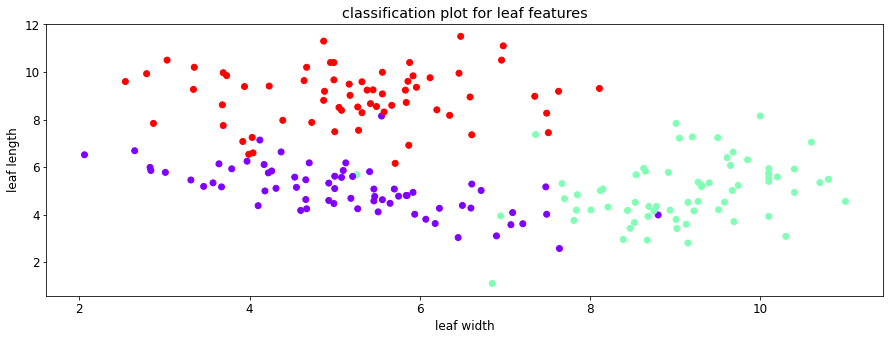

In [184]:
# Run this code to plot the leaf features

# This extracts the features. drop() deletes the column we state (tree_type), leaving on the features
allFeatures = dataset.drop(['tree_type'], axis = 1)

# This keeps only the column we state (tree_type), leaving only our label
labels = np.array(dataset['tree_type'])
# labels = dataset['tree_type'].values.ravel()
# print(labels)

#Plots the graph
X = allFeatures['leaf_width']
Y = allFeatures['leaf_length']
color=labels
graph.scatter(X, Y, c = color)
graph.title('classification plot for leaf features')
graph.xlabel('leaf width')
graph.ylabel('leaf length')
graph.show()

__Run the code__ in the cell below to plot the trunk features

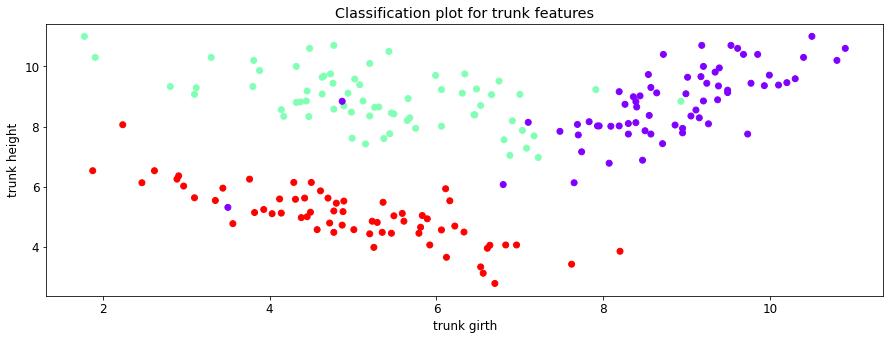

In [185]:
# Run this code to plot the trunk features
graph.scatter(allFeatures['trunk_girth'], allFeatures['trunk_height'], c = labels)
graph.title('Classification plot for trunk features')
graph.xlabel('trunk girth')
graph.ylabel('trunk height')
graph.show()

#### Let's look at the correlation between various features

In [186]:
dataset.corr()

,leaf_width,leaf_length,trunk_girth,trunk_height,tree_type
leaf_width,1.000000,-0.379532,-0.314294,0.268462,0.022266
leaf_length,-0.379532,1.000000,-0.319195,-0.800874,0.726038
trunk_girth,-0.314294,-0.319195,1.000000,0.333276,-0.727279
trunk_height,0.268462,-0.800874,0.333276,1.000000,-0.737023
tree_type,0.022266,0.726038,-0.727279,-0.737023,1.000000


Relationship between combined features

Step 2
-----

Lets make a support vector machine.

The syntax for a support vector machine is as follows:

__`model = svm.SVC().fit(features, labels)`__

Your features set will be called __`train_X`__ and your labels set will be called __`train_Y`__

#### Let's first run the SVM in the cell below using the first two features, the leaf features.

In [189]:
# Sets up the feature and target sets for leaf features

# Feature 1
feature_one = allFeatures['leaf_width'].values

# Feature 2
feature_two = allFeatures['leaf_length'].values

# Features
train_X = np.asarray([feature_one, feature_two]).transpose()

# Labels
train_Y = labels 

# Fits the SVM model
model_leaf = svm.SVC(kernel='linear').fit(train_X, train_Y)

# accuracy = model.score(X_test, Y_test)
accuracy = model_leaf.score(train_X, train_Y)
print(accuracy)

print("Model ready. Now plot it to see the result.")

0.94
Model ready. Now plot it to see the result.


#### Let's plot it! Run the cell below to visualise the SVM with our dataset.

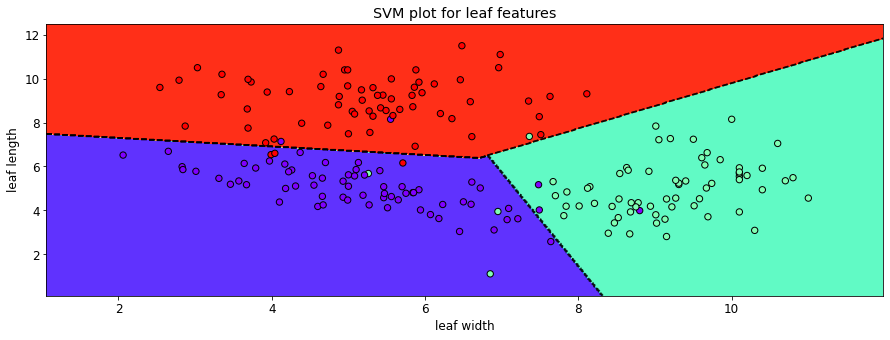

In [190]:
# Run this to plots the SVM model
X_min, X_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
Y_min, Y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(X_min, X_max, .02), np.arange(Y_min, Y_max, .02))
Z = model_leaf.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

graph.scatter(feature_one, feature_two, c = train_Y, cmap = graph.cm.rainbow, zorder = 10, edgecolor = 'k', s = 40)
graph.contourf(XX, YY, Z, cmap = graph.cm.rainbow, alpha = 1.0)
graph.contour(XX, YY, Z, colors = 'k', linestyles = '--', alpha=0.5)

graph.title('SVM plot for leaf features')
graph.xlabel('leaf width')
graph.ylabel('leaf length')
# graph.legend(['Tree 0', 'Tree 1', 'Tree 2'])

graph.show()

The graph shows three colored zones that the SVM has chosen to group the datapoints in. Color, here, means type of tree. As we can see, the zones correspond reasonably well with the actual tree types of our training data. This means that the SVM can group, for its training data, quite well calculate tree type based on leaf features.


Now let's do the same using trunk features.

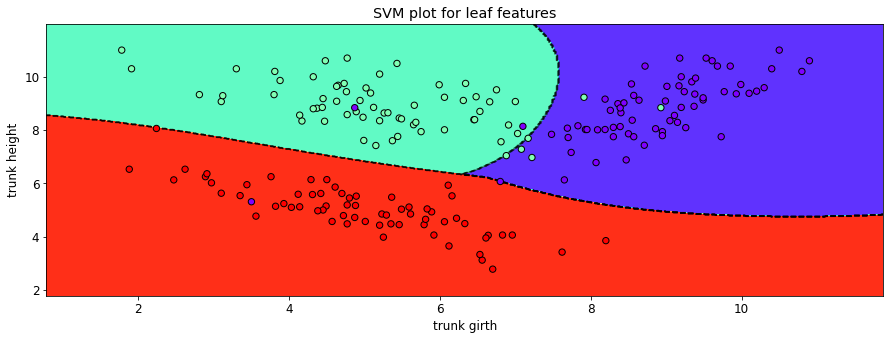

In [191]:
# Feature 1
trunk_girth = allFeatures['trunk_girth'].values
###

# Feature 2
trunk_height = allFeatures['trunk_height'].values
###

# Features
trunk_features = np.asarray([trunk_girth, trunk_height]).transpose()

# Fits the SVM model
model_trunk = svm.SVC().fit(trunk_features, train_Y)

# Plots the SVM model
X_min, X_max = trunk_features[:, 0].min() - 1, trunk_features[:, 0].max() + 1
Y_min, Y_max = trunk_features[:, 1].min() - 1, trunk_features[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(X_min, X_max, .02), np.arange(Y_min, Y_max, .02))
Z = model_trunk.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

graph.scatter(trunk_girth, trunk_height, c = train_Y, cmap = graph.cm.rainbow, zorder = 10, edgecolor = 'k', s = 40)
graph.contourf(XX, YY, Z, cmap = graph.cm.rainbow, alpha = 1.0)
graph.contour(XX, YY, Z, colors = 'k', linestyles = '--', alpha = 0.5)

graph.title('SVM plot for leaf features')
graph.xlabel('trunk girth')
graph.ylabel('trunk height')
# graph.legend(['Tree 0', 'Tree 1', 'Tree 2'])

graph.show()

Let's now do it with all features. Note that it can be difficult to visualize the decision surface for a lot of features. We will thus make use of Principle Component Analysis (PCA) for dimentionality reduction.

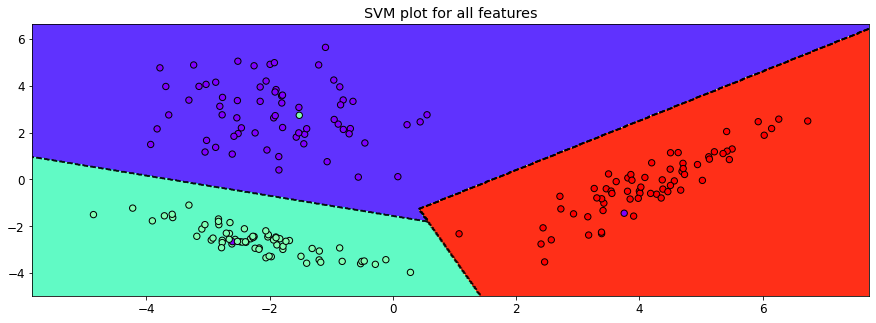

In [192]:
features = allFeatures

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(features)
pca_2d = pca.transform(features)

# Fits the SVM model
model_all = svm.SVC(kernel='linear').fit(pca_2d, train_Y)

# Plots the SVM model
X_min, X_max = pca_2d[:, 0].min() - 1, pca_2d[:, 0].max() + 1
Y_min, Y_max = pca_2d[:, 1].min() - 1, pca_2d[:, 1].max() + 1

# get coordinate matrices from coordinate vectors.
XX, YY = np.meshgrid(np.arange(X_min, X_max, .02), np.arange(Y_min, Y_max, .02))
Z = model_all.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# Z = model_all.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
# print(model_all.score(pca_2d, train_Y))

graph.scatter(pca_2d[:, 0], pca_2d[:, 1], c = train_Y, cmap = graph.cm.rainbow, zorder = 10, edgecolor = 'k', s = 40)
graph.contourf(XX, YY, Z, cmap = graph.cm.rainbow, alpha = 1.0)
graph.contour(XX, YY, Z, colors = 'k', linestyles = '--', alpha = 0.5)

graph.title('SVM plot for all features')
# graph.legend(['Tree 0', 'Tree 1',   'Tree 2'])

graph.show()

Plot the support vectors. This tells some advantages of SVMs:


*   Memory efficient
*   Not affected by outliers



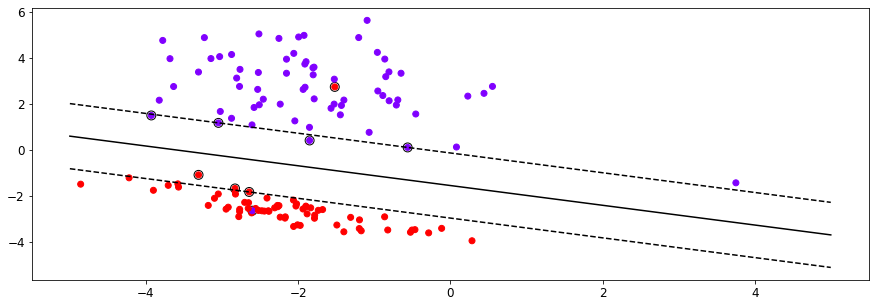

In [193]:
X = pca_2d
Y = train_Y

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
graph.plot(xx, yy, 'k-')
graph.plot(xx, yy_down, 'k--')
graph.plot(xx, yy_up, 'k--')

graph.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolors='k')
graph.scatter(X[:, 0], X[:, 1], c=Y, cmap=graph.cm.rainbow)

graph.axis('tight')
graph.show()

Alternative way to plot the optimal separating hyperplane.

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

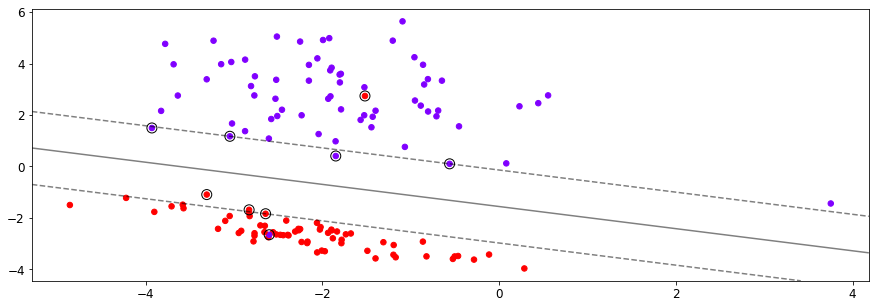

In [194]:
graph.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=graph.cm.rainbow)

# plot the decision function
ax = graph.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
graph.axis('tight')
graph.show()

Let us do a 3D plot of the desicion surface. And this explains why SVMs are very good when dealing with non-linearly separable data by making using of kernel trick.

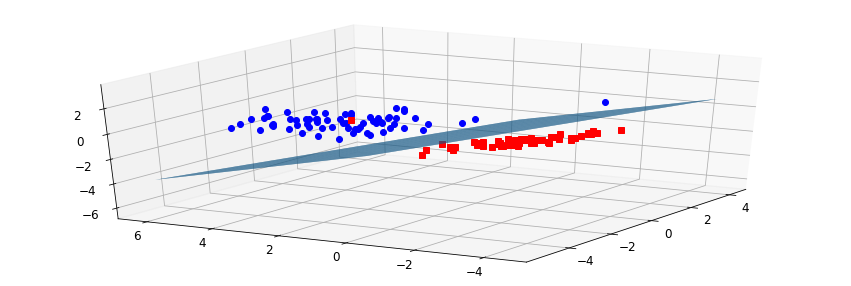

In [195]:
from mpl_toolkits.mplot3d import Axes3D

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
X = pca_2d
Y = train_Y

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

fig = graph.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1],'sr')
ax.plot_surface(XX, YY, Z)

ax.view_init(30, 210)
graph.show()

## Saving your model

In [196]:
import joblib
joblib.dump(model_all, 'model_all.pkl')
joblib.dump(model_all, 'model_leaf.pkl')
joblib.dump(model_all, 'model_trunk.pkl')

['model_trunk.pkl']

### Once the model is saved we can use scikit-learn in our destination application (e.g., web application) to load the model:

In [197]:
# Load model from file
classifer_all = joblib.load("model_all.pkl")
classifer_leaf = joblib.load("model_leaf.pkl")
classifer_trunk = joblib.load("model_trunk.pkl")

# Create new observation
tree_a = [5.13, 6.18, 8.26, 8.74 ] # 0
tree_b = [5.7,  5.08, 8.3, 8.1] # 0
tree_c = [2.79, 9.93, 6.56, 3.12] # 2
tree_d = [9.01, 7.74, 3.1, 9.07] # 1

# X_a = np.array([tree_a])
# X_b = np.array([tree_b])

# pca_a = PCA(n_components=1).fit(X_a)
# pca_a2d = pca_a.transform(X_a)
# pca_b = PCA(n_components=1).fit(X_b)
# pca_b2d = pca_b.transform(X_b)

# Predict observation's class
# result_all_a = classifer_all.predict(pca_a2d)
# results_all_b = classifer_all.predict(pca_b2d)

results_leaf_a = classifer_leaf.predict([tree_a[:2]])
results_leaf_b = classifer_leaf.predict([tree_b[:2]])
results_trunk_a = classifer_trunk.predict([tree_a[2:]])
results_trunk_b = classifer_trunk.predict([tree_a[2:]])

print("TREES | LEAF | TRUNK")
print("----------------------------")
print(f"A  | {results_leaf_a} | {results_trunk_a}")
print(f"B  | {results_leaf_b} | {results_trunk_b}")

# for count, features in enumerate(new_observation):
#   print(f"{features}: {results_all[count]} {results_leaf[count]} {results_trunk[count]}")

TREES | LEAF | TRUNK
----------------------------
A  | [0] | [0]
B  | [0] | [0]


Conclusion
-------

And that's it! You've made a simple support vector machine that can predict the type of tree based on the leaf and trunk measurements!